In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

def get_relay_curve(In=1, order=4, C=1):
    def relay_curve(I, *ks):
        t = 0
        for order, k in enumerate(ks):
            t += k*np.log10((I/In)-C)**order
        return 10**t
    return relay_curve


In [2]:
curve_u = np.genfromtxt('curve_u.csv', delimiter=',', dtype=float)
i_u = np.round(curve_u[:, 0],2)
t_u = np.round(curve_u[:, 1],2)
display(i_u, t_u)

curve_l = np.genfromtxt('curve_l.csv', delimiter=',', dtype=float)
i_l = np.round(curve_l[:, 0],2)
t_l = np.round(curve_l[:, 1],2)
display(i_l, t_l)

array([1.24, 1.26, 1.31, 1.38, 1.47, 1.59, 1.75, 1.95, 2.23, 2.64, 3.3 ,
       4.49, 6.53, 9.5 ])

array([7433.51, 4690.68, 3062.91, 1953.46, 1271.65,  814.29,  520.86,
        335.18,  216.41,  141.86,   92.56,   60.25,   40.84,   29.47])

array([1.09, 1.11, 1.14, 1.18, 1.22, 1.28, 1.35, 1.44, 1.55, 1.72, 1.94,
       2.26, 2.75, 3.59, 5.25, 7.89])

array([7528.4 , 4897.03, 2996.23, 1754.14, 1069.51,  691.57,  433.82,
        282.28,  180.98,  114.42,   73.1 ,   47.44,   30.83,   20.04,
         13.17,    9.36])

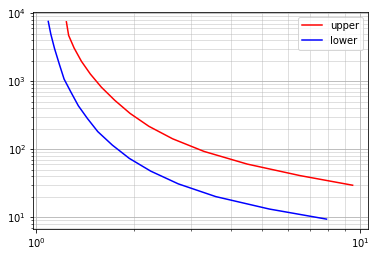

In [22]:
xdata = np.array(i_u)
ydata = np.array(t_u)
plt.plot(xdata, ydata, 'r-', label='upper')

xdata = np.array(i_l)
ydata = np.array(t_l)
plt.plot(xdata, ydata, 'b-', label='lower')

plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()

[2.25191, -1.27781, 0.36096, 0.34035, -0.26593, -0.11799, 0.04583]

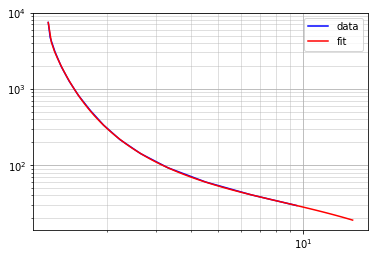

In [11]:
# Curve fitting upper

In = 1.2
order=6
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_u)
ydata = np.array(t_u)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 15, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))

[1.78824, -1.45092, 0.52364, 0.13523, -0.10738]

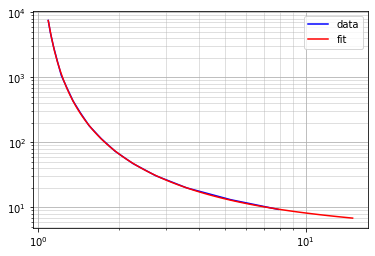

In [23]:
# Curve fitting lower

In=1.03
order=4
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_l)
ydata = np.array(t_l)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 15, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))